In [67]:
# Importations nécessaires
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.initializers import GlorotUniform
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import model_from_json
%matplotlib inline
from datetime import datetime
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.regularizers import l1, l2
from keras.layers import Bidirectional
from keras.layers import Dropout




In [65]:

# Charger les données
df = pd.read_csv('Miles_Traveled.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.resample('MS').mean()
df = df.fillna(method='ffill')


# Configuration des données
n_input = 6
n_features = 1

# Séparer les données en ensembles d'entraînement et de test 80%
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mise à l'échelle des données
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Création du générateur de séries temporelles
train_generator = TimeseriesGenerator(
    train_scaled, train_scaled, length=n_input, batch_size=1)


In [97]:

# # Création du modèle LSTM
# model = Sequential()
# model.add(LSTM(150, activation='tanh', input_shape=(
#     n_input, n_features), kernel_initializer=GlorotUniform()))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

#  version améliorée
# model = Sequential()
# from keras.regularizers import l1, l2
# model.add(LSTM(150, activation='tanh', input_shape=(n_input, n_features), kernel_initializer=GlorotUniform(), kernel_regularizer=l2(0.01)))
# ou
# from keras.layers import Bidirectional
# model.add(Bidirectional(LSTM(150, activation='tanh'), input_shape=(n_input, n_features)))
#  ou
# model.add(LSTM(200, activation='tanh', return_sequences=True,
#           input_shape=(n_input, n_features)))
# model.add(Dropout(0.2))
# model.add(LSTM(100, activation='tanh', return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')


#  version améliorée
from keras.layers import Bidirectional, BatchNormalization

model = Sequential()
model.add(Bidirectional(LSTM(200, activation='tanh', return_sequences=True,
                             input_shape=(n_input, n_features))))
model.add(Dropout(0.3))
model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(100, activation='tanh', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='mean_squared_error')


# Entraînement du modèle
history = model.fit(train_generator, epochs=20)


Epoch 1/20
464/464 [==============================] - 13s 9ms/step - loss: 0.0256
Epoch 2/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0175
Epoch 3/20
464/464 [==============================] - 5s 10ms/step - loss: 0.0153
Epoch 4/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0129
Epoch 5/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0115
Epoch 6/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0118
Epoch 7/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0095
Epoch 8/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0100
Epoch 9/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0094
Epoch 10/20
464/464 [==============================] - 4s 10ms/step - loss: 0.0089
Epoch 11/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0085
Epoch 12/20
464/464 [==============================] - 4s 9ms/step - loss: 0.0089
Epoch 13/20
464/464 [=

112/112 [==============================] - 2s 2ms/step
Mean Squared Error (MSE): 444094956.35657173
Mean Absolute Percentage Error (MAPE): 0.06682311401949344
1/1 [==============================] - 0s 19ms/step
First test prediction (original scale): [[253552.25]]
1/1 [==============================] - 0s 19ms/step
Prédiction 0: [0.9088013]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 21ms/step
Prédiction 1: [0.8993728]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 2: [0.9133606]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 3: [0.9179909]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 4: [0.9169384]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 5: [0.9210409]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [============================

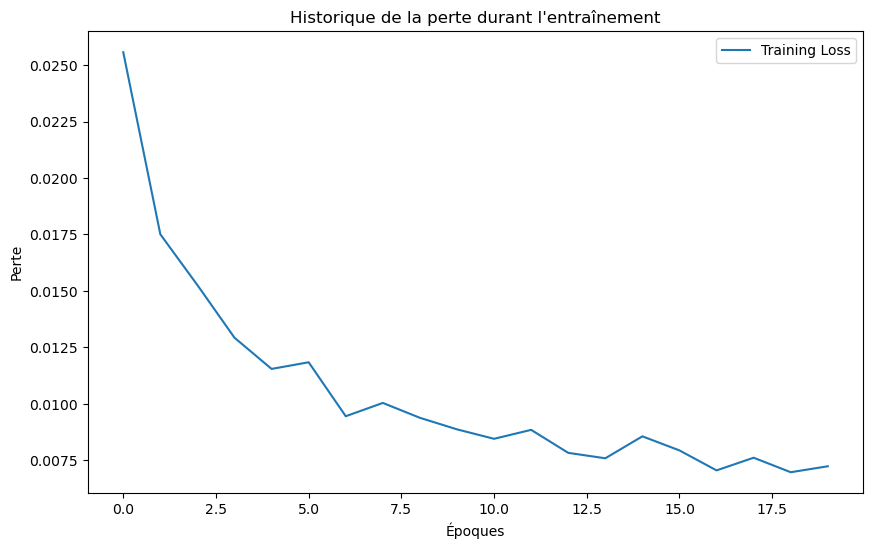

1/1 [==============================] - 0s 23ms/step
Prédiction 0: [0.9088013]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 22ms/step
Prédiction 1: [0.8993728]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 2: [0.9133606]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 20ms/step
Prédiction 3: [0.9179909]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 24ms/step
Prédiction 4: [0.9169384]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 21ms/step
Prédiction 5: [0.9210409]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 19ms/step
Prédiction 6: [0.92344475]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 19ms/step
Prédiction 7: [0.9228785]
Dimensions actuelles du lot: (1, 6, 1)
1/1 [==============================] - 0s 19ms/step
Prédiction 

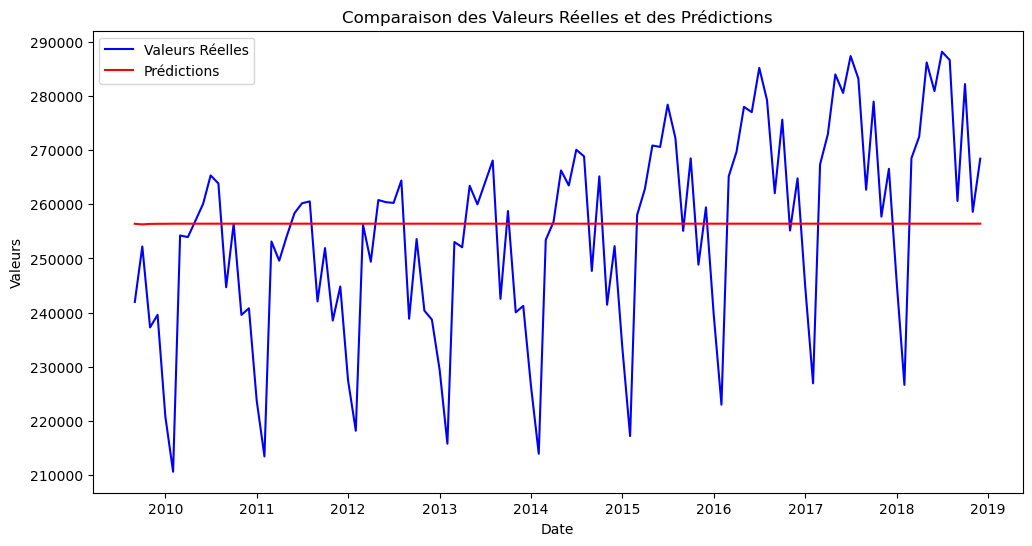

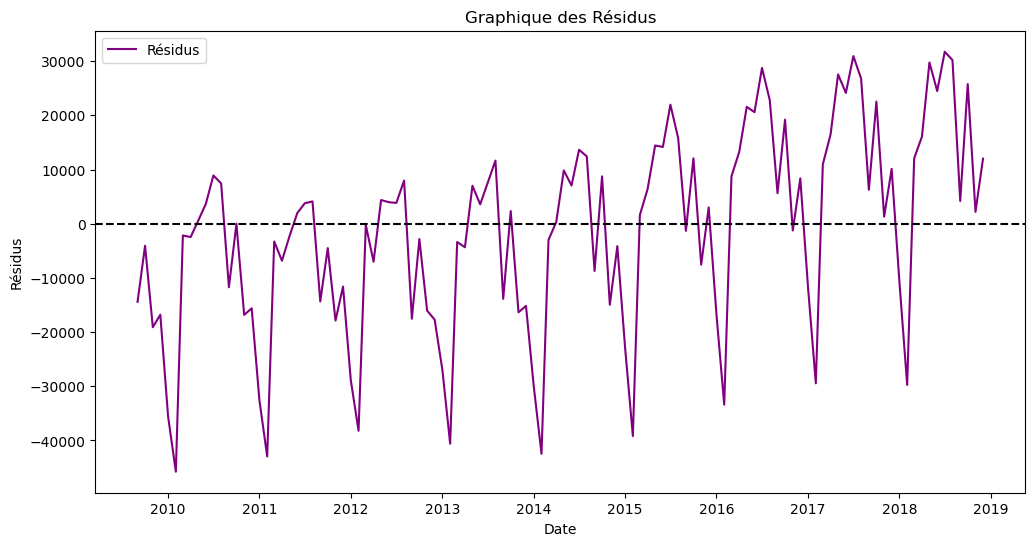

In [98]:

# Prédictions
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import model_from_json
test_generator = TimeseriesGenerator(
    test_scaled, test_scaled, length=n_input, batch_size=1)
y_pred = model.predict(test_generator)

# Inverser la mise à l'échelle pour obtenir les vraies valeurs
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(test_scaled[n_input:])

# Calcul des métriques
mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Sauvegarder l'architecture du modèle au format JSON
model_json = model.to_json()
with open("model_LSTM.json", "w") as json_file:
    json_file.write(model_json)

# Sauvegarder les poids du modèle au format HDF5
model.save_weights("model_LSTM_weights.h5")


# # Charger l'architecture du modèle à partir du fichier JSON
# with open("model_LSTM.json", "r") as json_file:
#     loaded_model_json = json_file.read()
# loaded_model = model_from_json(loaded_model_json)

# # Charger les poids du modèle à partir du fichier HDF5
# loaded_model.load_weights("model_LSTM_weights.h5")

# Sélectionnez les derniers points de données de l'ensemble d'entraînement
first_eval_batch = train_scaled[-n_input:]

# Redimensionnez le lot pour correspondre au format attendu par le modèle
# Le nouveau format doit être [1, n_input, n_features]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

# Maintenant, vous pouvez utiliser ce lot pour faire une première prédiction
first_pred = model.predict(first_eval_batch)

# Sélectionnez les derniers points de données de l'ensemble d'entraînement
last_train_batch = train_scaled[-n_input:]

# Redimensionnez le lot pour correspondre au format attendu par le modèle
# Le format doit être [1, n_input, n_features]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

# Faire la prédiction pour le premier point de l'ensemble de test
first_test_prediction = model.predict(last_train_batch)

# Appliquer la transformation inverse pour obtenir la valeur originale
first_test_prediction_original = scaler.inverse_transform(
    first_test_prediction)

print("First test prediction (original scale):", first_test_prediction_original)

# FORECAST USING RNN MODEL

test_predictions = []
first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # Obtenir la prédiction actuelle
    current_pred = model.predict(current_batch)[0]

    # Ajouter la prédiction à la liste des prédictions
    test_predictions.append(current_pred)

    # Mettre à jour le lot pour inclure la nouvelle prédiction
    current_batch = np.append(current_batch[:, 1:, :], [
                              [current_pred]], axis=1)

    # Imprimez pour comprendre les dimensions et les valeurs
    print(f"Prédiction {i}: {current_pred}")
    print(f"Dimensions actuelles du lot: {current_batch.shape}")

# Appliquer la transformation inverse pour obtenir les valeurs originales
test_predictions_original = scaler.inverse_transform(test_predictions)

# Imprimer les prédictions finales
print("Prédictions finales (échelle originale):")
print(test_predictions_original)


test_predictions_original = scaler.inverse_transform(test_predictions)

# Assurez-vous que la partie mise à l'échelle de test commence à partir de l'indice 'n_input'
y_test_original = scaler.inverse_transform(test_scaled[n_input:])

# Comparez maintenant 'y_test_original' avec 'test_predictions_original'

# Tronquer test_scaled pour correspondre à la longueur des prédictions
# Assurez-vous que la longueur de test_scaled est égale à n_input + longueur de y_test_original_truncated
test_scaled_adjusted = test_scaled[-(n_input +
                                     len(y_test_original_truncated)):]

# Générer les prédictions en utilisant test_scaled_adjusted
# Votre code de prédiction ici...

# Assurez-vous maintenant que la longueur des prédictions correspond à celle de y_test_original_truncated
test_predictions_adjusted = test_predictions_original[-len(
    y_test_original_truncated):]

# Calculer les métriques
mse = mean_squared_error(y_test_original_truncated, test_predictions_adjusted)
mae = mean_absolute_error(y_test_original_truncated, test_predictions_adjusted)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


# Ajuster la longueur de test_predictions_original pour qu'elle corresponde à celle de y_test_original
test_predictions_adjusted = test_predictions_original[-len(y_test_original):]

# Créer un DataFrame avec les valeurs réelles et les prédictions
results_df = pd.DataFrame({
    # Convertir en un tableau 1D si nécessaire
    'Real Values': y_test_original.ravel(),
    # De même, convertir en 1D si nécessaire
    'Predictions': test_predictions_adjusted.ravel()
})

print(results_df)


# Supposons que vous avez déjà formé votre modèle et enregistré l'historique
# history = model.fit(...)

# Extraire les valeurs de perte
loss = history.history['loss']

# Tracer le graphique de la perte
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.title('Historique de la perte durant l\'entraînement')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()
plt.show()

test_predictions = []
first_eval_batch = train_scaled[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    # Obtenir la prédiction actuelle
    current_pred = model.predict(current_batch)[0]

    # Ajouter la prédiction à la liste des prédictions
    test_predictions.append(current_pred)

    # Mettre à jour le lot pour inclure la nouvelle prédiction
    current_batch = np.append(current_batch[:, 1:, :], [
                              [current_pred]], axis=1)

    # Imprimez pour comprendre les dimensions et les valeurs
    print(f"Prédiction {i}: {current_pred}")
    print(f"Dimensions actuelles du lot: {current_batch.shape}")

# Appliquer la transformation inverse pour obtenir les valeurs originales
test_predictions_original = scaler.inverse_transform(test_predictions)

# Imprimer les prédictions finales
print("Prédictions finales (échelle originale):")
print(test_predictions_original)


print(f"\ny_test_original :{len(y_test_original)} ")
print(f"test_predictions_original :{len(test_predictions_original)} ")
print(f"test_predictions_adjusted :{len(test_predictions_adjusted)} ")
print(f"\ny_test_original :\n{y_test_original} \n")


print(f"\n test_predictions_original:\n{test_predictions_original} \n")
print(f"\n test_predictions_adjusted:\n{test_predictions_adjusted} \n")

# Ajuster la longueur de test_predictions_original pour qu'elle corresponde à celle de y_test_original
test_predictions_adjusted = test_predictions_original[-len(y_test_original):]

mse = mean_squared_error(y_test_original, test_predictions_adjusted)
mae = mean_absolute_error(y_test_original, test_predictions_adjusted)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Ajuster la longueur de test_predictions_original pour qu'elle corresponde à celle de y_test_original
test_predictions_adjusted = test_predictions_original[-len(y_test_original):]

# Créer un DataFrame avec les valeurs réelles et les prédictions
results_df = pd.DataFrame({
    'Original': y_test_original.ravel(),  # Convertir en un tableau 1D si nécessaire
    # De même, convertir en 1D si nécessaire
    'Predictions': test_predictions_adjusted.ravel()
})

print(results_df)


# Assurez-vous que les valeurs sont correctement alignées dans le temps
results_df.index = pd.to_datetime(df.index[-len(results_df):])

plt.figure(figsize=(12, 6))
plt.plot(results_df['Original'], label='Valeurs Réelles', color='blue')
plt.plot(results_df['Predictions'], label='Prédictions', color='red')
plt.title('Comparaison des Valeurs Réelles et des Prédictions')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Calcul des résidus (différence entre la valeur réelle et la prédiction)
results_df['Residuals'] = results_df['Original'] - results_df['Predictions']

plt.figure(figsize=(12, 6))
plt.plot(results_df['Residuals'], label='Résidus', color='purple')
plt.title('Graphique des Résidus')
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')  # Ligne à zéro pour référence
plt.legend()
plt.show()


Epoch 1/30
458/458 [==============================] - 14s 13ms/step - loss: 0.0332
Epoch 2/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0159
Epoch 3/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0108
Epoch 4/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0079
Epoch 5/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0075
Epoch 6/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0064
Epoch 7/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0067
Epoch 8/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0056
Epoch 9/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0055
Epoch 10/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0056
Epoch 11/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0050
Epoch 12/30
458/458 [==============================] - 6s 13ms/step - loss: 0.0045
Epoch 13/30


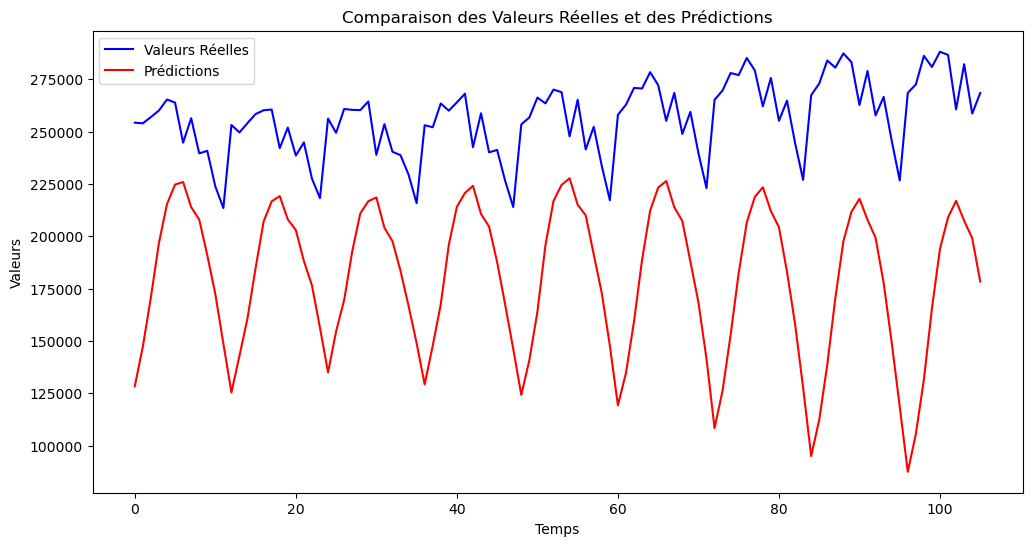

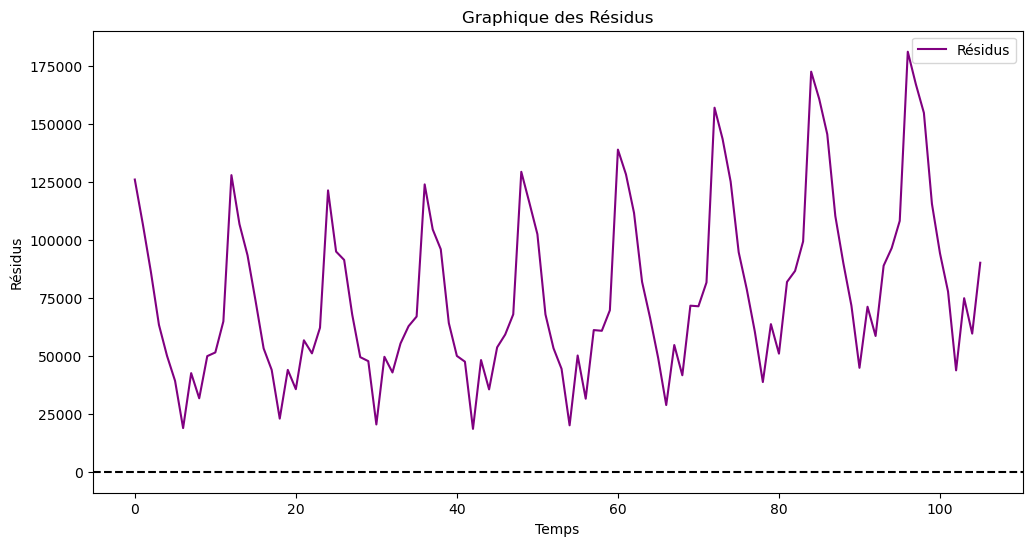

In [99]:
from keras.layers import Bidirectional, BatchNormalization
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt

# Votre code de préparation des données ici...

# Charger les données
df = pd.read_csv('Miles_Traveled.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.resample('MS').mean()
df = df.fillna(method='ffill')


# Configuration des données
n_input = 12
n_features = 1

# Séparer les données en ensembles d'entraînement et de test 80%
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mise à l'échelle des données
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Création du générateur de séries temporelles
train_generator = TimeseriesGenerator(
    train_scaled, train_scaled, length=n_input, batch_size=1)

# *************************************************
# Supposons que 'model' est votre modèle LSTM déjà entraîné.
# # Création du modèle LSTM
# model = Sequential()
# model.add(LSTM(150, activation='tanh', input_shape=(
#     n_input, n_features), kernel_initializer=GlorotUniform()))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

#  version améliorée
# model = Sequential()
# from keras.regularizers import l1, l2
# model.add(LSTM(150, activation='tanh', input_shape=(n_input, n_features), kernel_initializer=GlorotUniform(), kernel_regularizer=l2(0.01)))
# ou
# from keras.layers import Bidirectional
# model.add(Bidirectional(LSTM(150, activation='tanh'), input_shape=(n_input, n_features)))
#  ou
# model.add(LSTM(200, activation='tanh', return_sequences=True,
#           input_shape=(n_input, n_features)))
# model.add(Dropout(0.2))
# model.add(LSTM(100, activation='tanh', return_sequences=False))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')


#  version améliorée

model = Sequential()
model.add(Bidirectional(LSTM(200, activation='tanh', return_sequences=True,
                             input_shape=(n_input, n_features))))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LSTM(100, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='RMSprop', loss='mean_squared_error')


# Entraînement du modèle
history = model.fit(train_generator, epochs=30)

# *************************************************
# Si vous avez besoin de recharger le modèle, utilisez:
# model = load_model('chemin_vers_votre_modèle.h5')

# Générer des prédictions pour les données de test
test_generator = TimeseriesGenerator(
    test_scaled, test_scaled, length=n_input, batch_size=1)
y_pred = model.predict(test_generator)

# Inverser la mise à l'échelle pour obtenir les vraies valeurs
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(test_scaled[n_input:])

# Calcul des métriques d'erreur
mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Préparer un DataFrame pour la comparaison des résultats
results_df = pd.DataFrame({
    'Real Values': y_test_original.ravel(),
    'Predictions': y_pred_original.ravel()
})

# Calcul des résidus
results_df['Residuals'] = results_df['Real Values'] - results_df['Predictions']

# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(results_df['Real Values'], label='Valeurs Réelles', color='blue')
plt.plot(results_df['Predictions'], label='Prédictions', color='red')
plt.title('Comparaison des Valeurs Réelles et des Prédictions')
plt.xlabel('Temps')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Tracer les résidus
plt.figure(figsize=(12, 6))
plt.plot(results_df['Residuals'], label='Résidus', color='purple')
plt.title('Graphique des Résidus')
plt.xlabel('Temps')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()


Epoch 1/100
411/411 [==============================] - 13s 16ms/step - loss: 0.0183 - val_loss: 0.0062
Epoch 2/100
  9/411 [..............................] - ETA: 5s - loss: 0.0251

C:\Users\romar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


411/411 [==============================] - 6s 14ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 3/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 4/100
411/411 [==============================] - 6s 14ms/step - loss: 0.0087 - val_loss: 0.0144
Epoch 5/100
411/411 [==============================] - 6s 14ms/step - loss: 0.0080 - val_loss: 0.0104
Epoch 6/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 7/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0049 - val_loss: 0.0489
Epoch 8/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0062 - val_loss: 0.0038
Epoch 9/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 10/100
411/411 [==============================] - 5s 13ms/step - loss: 0.0037 - val_loss: 0.0167
Epoch 11/100
411/411 [==============================] - 6s 14ms/step - loss: 0.0042 - val_los

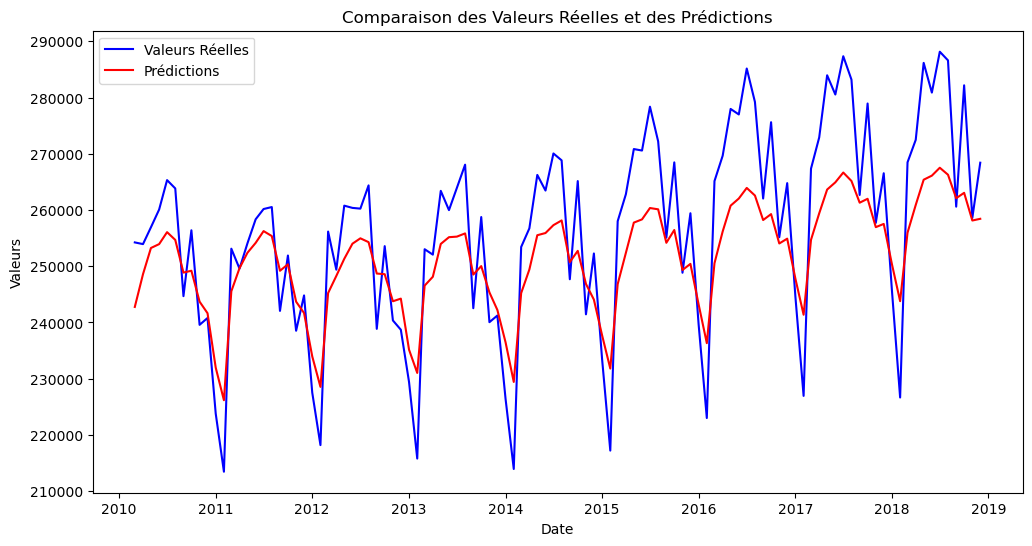

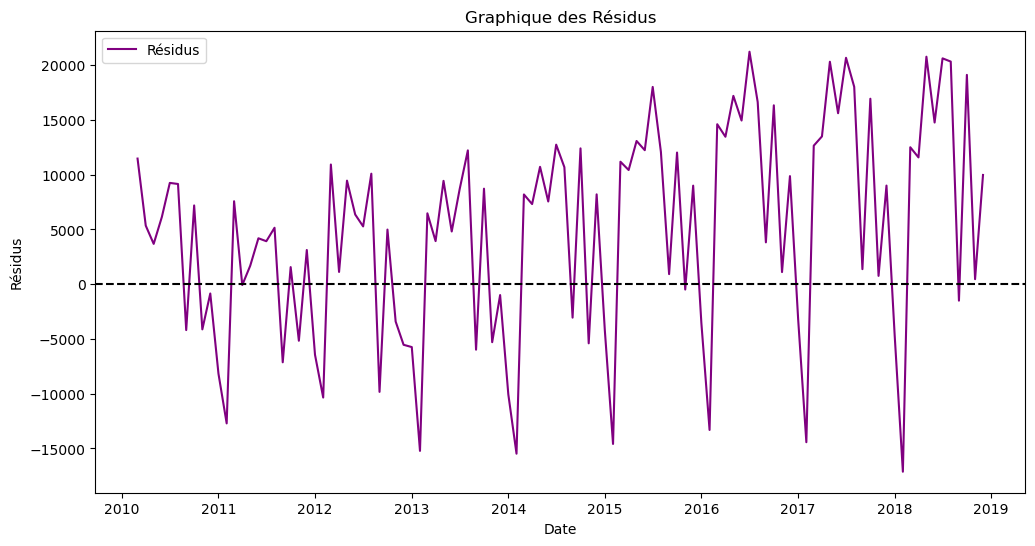

In [101]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('Miles_Traveled.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.resample('MS').mean()
df = df.fillna(method='ffill')

# Configuration des données
n_input = 12
n_features = 1

# Séparer les données en ensembles d'entraînement et de test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mise à l'échelle des données
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Définissez la taille de la validation, par exemple 10% des données d'entraînement
validation_size = int(len(train_scaled) * 0.1)

# Créez des ensembles d'entraînement et de validation séparés
train_generator = TimeseriesGenerator(train_scaled[:-validation_size], train_scaled[:-validation_size],
                                      length=n_input, batch_size=1)

validation_generator = TimeseriesGenerator(train_scaled[-validation_size:], train_scaled[-validation_size:],
                                           length=n_input, batch_size=1)

# Créez et compilez le modèle comme avant
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True,
                             input_shape=(n_input, n_features))))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks pour l'entraînement
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

# Entraînez le modèle en utilisant le générateur de validation
history = model.fit(train_generator, epochs=100, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])


# Chargement du meilleur modèle enregistré
model.load_weights('best_model.h5')

# Générer des prédictions pour les données de test
test_generator = TimeseriesGenerator(
    test_scaled, test_scaled, length=n_input, batch_size=1)
y_pred = model.predict(test_generator)

# Inverser la mise à l'échelle pour obtenir les vraies valeurs
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(test_scaled[n_input:])

# Calcul des métriques d'erreur
mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Préparer un DataFrame pour la comparaison des résultats
results_df = pd.DataFrame({'Real Values': y_test_original.ravel(),
                           'Predictions': y_pred_original.ravel()})

# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):],
         results_df['Real Values'], label='Valeurs Réelles', color='blue')
plt.plot(df.index[-len(y_test_original):],
         results_df['Predictions'], label='Prédictions', color='red')
plt.title('Comparaison des Valeurs Réelles et des Prédictions')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Tracer les résidus
results_df['Residuals'] = results_df['Real Values'] - results_df['Predictions']
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):],
         results_df['Residuals'], label='Résidus', color='purple')
plt.title('Graphique des Résidus')
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()


In [104]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('Miles_Traveled.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df = df.resample('MS').mean()
df = df.fillna(method='ffill')

# Configurer les données
n_input = 18
n_features = 1

# Séparer les données en ensembles d'entraînement et de test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Mettre à l'échelle les données
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Créer le générateur de séries temporelles pour l'entraînement
validation_size = int(len(train_scaled) * 0.1)
train_generator = TimeseriesGenerator(train_scaled[:-validation_size], train_scaled[:-validation_size],
                                      length=n_input, batch_size=1)

# Créer le générateur de séries temporelles pour la validation
validation_generator = TimeseriesGenerator(train_scaled[-validation_size:], train_scaled[-validation_size:],
                                           length=n_input, batch_size=1)

# Construire le modèle LSTM
model = Sequential()
model.add(Bidirectional(LSTM(200, activation='relu', return_sequences=True,
                             input_shape=(n_input, n_features))))
model.add(Dropout(0.2))
model.add(LSTM(150, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Définir les callbacks pour l'entraînement
early_stopping = EarlyStopping(
    monitor='val_loss', patience=18, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)

# Entraîner le modèle
history = model.fit(train_generator, epochs=150, validation_data=validation_generator,
                    callbacks=[early_stopping, model_checkpoint])

# Charger le meilleur modèle sauvegardé
model.load_weights('best_model.h5')

# Générer des prédictions pour les données de test
test_generator = TimeseriesGenerator(
    test_scaled, test_scaled, length=n_input, batch_size=1)
y_pred = model.predict(test_generator)

# Inverser la mise à l'échelle pour obtenir les vraies valeurs
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(test_scaled[n_input:])


Epoch 1/150
405/405 [==============================] - 14s 19ms/step - loss: 0.0172 - val_loss: 0.0105
Epoch 2/150
  7/405 [..............................] - ETA: 7s - loss: 0.0074    

C:\Users\romar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


405/405 [==============================] - 7s 17ms/step - loss: 0.0119 - val_loss: 0.0066
Epoch 3/150
405/405 [==============================] - 7s 17ms/step - loss: 0.0105 - val_loss: 0.0065
Epoch 4/150
405/405 [==============================] - 7s 16ms/step - loss: 0.0118 - val_loss: 0.0065
Epoch 5/150
405/405 [==============================] - 7s 17ms/step - loss: 0.0088 - val_loss: 0.0058
Epoch 6/150
405/405 [==============================] - 7s 16ms/step - loss: 0.0086 - val_loss: 0.0084
Epoch 7/150
405/405 [==============================] - 7s 17ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 8/150
405/405 [==============================] - 7s 17ms/step - loss: 0.0069 - val_loss: 0.0051
Epoch 9/150
405/405 [==============================] - 7s 16ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 10/150
405/405 [==============================] - 7s 16ms/step - loss: 0.0063 - val_loss: 0.0202
Epoch 11/150
405/405 [==============================] - 7s 17ms/step - loss: 0.0058 - val_los

Mean Squared Error (MSE): 135306142.94637656
Mean Absolute Percentage Error (MAPE): 0.0386910716763965


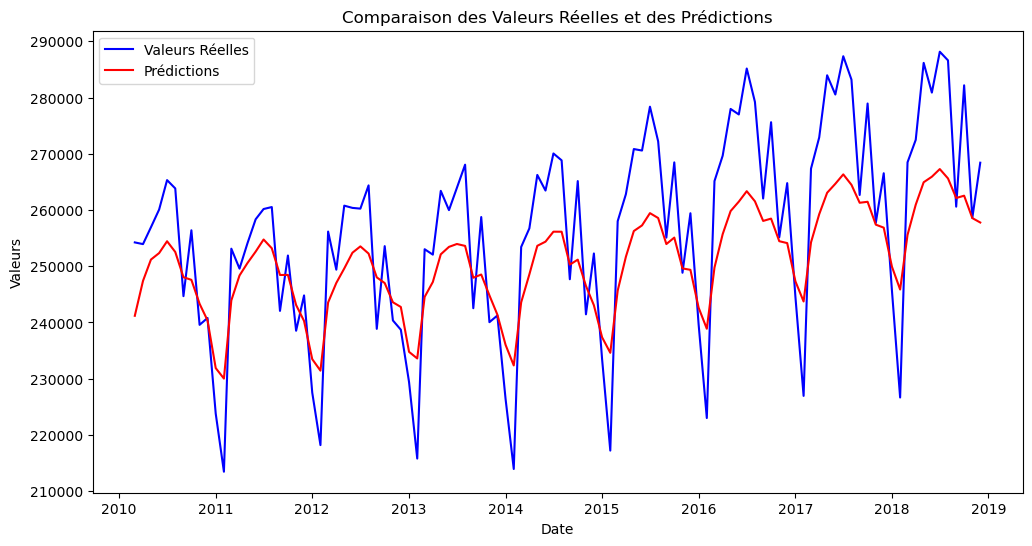

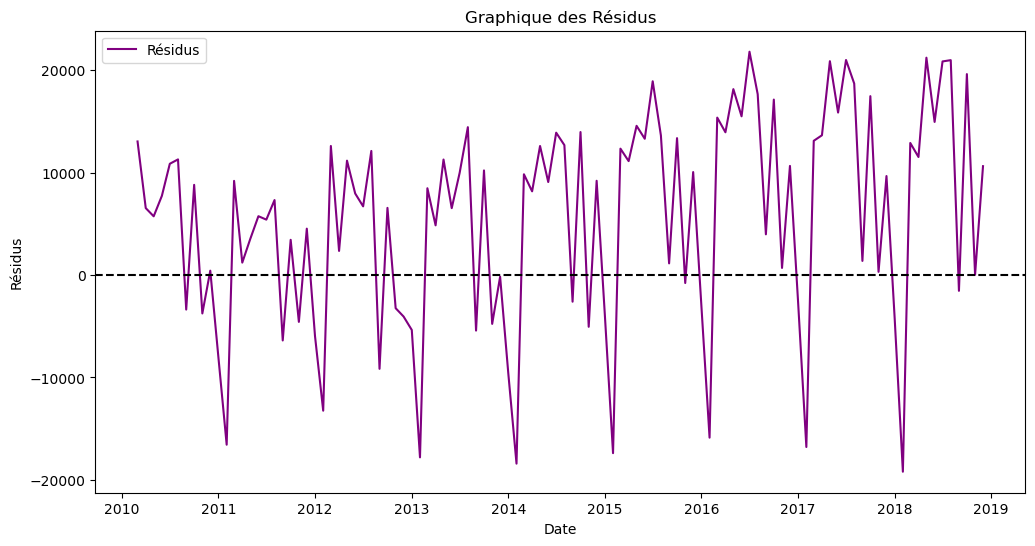

In [103]:
# Calcul des métriques d'erreur
mse = mean_squared_error(y_test_original, y_pred_original)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Préparer un DataFrame pour la comparaison des résultats
results_df = pd.DataFrame({'Real Values': y_test_original.ravel(),
                           'Predictions': y_pred_original.ravel()})

# Tracer les valeurs réelles et les prédictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):],
         results_df['Real Values'], label='Valeurs Réelles', color='blue')
plt.plot(df.index[-len(y_test_original):],
         results_df['Predictions'], label='Prédictions', color='red')
plt.title('Comparaison des Valeurs Réelles et des Prédictions')
plt.xlabel('Date')
plt.ylabel('Valeurs')
plt.legend()
plt.show()

# Tracer les résidus
results_df['Residuals'] = results_df['Real Values'] - results_df['Predictions']
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):],
         results_df['Residuals'], label='Résidus', color='purple')
plt.title('Graphique des Résidus')
plt.xlabel('Date')
plt.ylabel('Résidus')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()
plt.show()
